In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
import os
from tensorflow.keras import utils

# 進度條模組
from tqdm import tqdm
%matplotlib inline

In [2]:
#檢測tensorflow gpu是否啟用
tf.config.list_physical_devices("GPU")
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# 8種類
class_names = ['normal' , 'error_ear' , 'error_iron' , 'error_solder' , 'noearing' , 'noiron' , 'NG']

# 只挑選5類實驗
# class_names = ['normal'  , 'error_iron' , 'error_ear' , 'noiron' , 'noearing']

class_names_label = {class_name:i for i,class_name in enumerate(class_names)}
print(class_names_label)

nb_classes = len(class_names)

# IMAGE_SIZE = (210 , 360)
IMAGE_SIZE = (140 , 240)

{'normal': 0, 'error_ear': 1, 'error_iron': 2, 'error_solder': 3, 'noearing': 4, 'noiron': 5, 'NG': 6}


In [4]:
# def load_data():
#     datasets = ['mask/20211224_data/train' , 'mask/20211224_data/validation' , 'mask/20211224_data/test']
#     output = []
    
#     for dataset in datasets:
#         images = []
#         labels = []
        
#         print('Loading{}'.format(dataset))
        
#         for folder in os.listdir(dataset):
#             label = class_names_label[folder]
            
#             for file in (os.listdir(os.path.join(dataset , folder))):
                
#                 img_path = os.path.join(os.path.join(dataset , folder), file)
                
#                 image = cv2.imread(img_path)
#                 image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
#                 image = cv2.resize(image , IMAGE_SIZE)
                
#                 images.append(image)
#                 labels.append(label)
                
#         images = np.array(images , dtype = 'float32')
#         labels = np.array(labels , dtype = 'int32')
#         labels = utils.to_categorical(labels , nb_classes , dtype = 'int32')
#         output.append((images,labels))
        
#     return output 

In [5]:
# from tensorflow.keras import utils
# (train_images, train_labels), (val_images, val_labels), (test_images, test_labels) = load_data()

In [6]:
# from sklearn.utils import shuffle           

# train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
# val_images, val_labels = shuffle(val_images, val_labels, random_state=25)
# test_images, test_labels = shuffle(test_images, test_labels, random_state = 25)

In [7]:
# # check how many training and testing example do we have
# # check the size of image

# n_train = train_labels.shape[0]
# n_val = val_labels.shape[0]
# n_test = test_labels.shape[0]

# print('Number of training example : {}'.format(n_train))
# print('Number of validation example : {}'.format(n_val))
# print('Number of testing example : {}'.format(n_test))
# print('Each image is of size : {}'.format(IMAGE_SIZE))

In [8]:
# train_images = train_images / 255.0
# val_images = val_images / 255.0
# test_images = test_images / 255.0

In [9]:
# 灰階專用
# train_images = tf.expand_dims(train_images, axis=-1)
# val_images = tf.expand_dims(val_images, axis=-1)
# test_images = tf.expand_dims(test_images, axis=-1)

In [10]:
# print(train_images.shape)
# print(val_images.shape)

In [11]:
def to_grayscale(image):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Train_datagen = ImageDataGenerator(horizontal_flip=True
                             ,rescale = 1/255
                            ,width_shift_range = 0.03,
                            height_shift_range = 0.02,
                            preprocessing_function = to_grayscale)

Val_datagen = ImageDataGenerator(rescale = 1/255
                                ,preprocessing_function = to_grayscale)


Batch_Size = 8


train_generator = Train_datagen.flow_from_directory('E://mask_data//20211224_data//train',#类别子文件夹的上一级文件夹
                                    batch_size=Batch_Size,
                                    shuffle=True,
                                    target_size=IMAGE_SIZE,
                                    )


test_generator = Val_datagen.flow_from_directory('E://mask_data//20211224_data//test',#类别子文件夹的上一级文件夹
                                    batch_size=Batch_Size,
                                    shuffle=True,
                                    target_size=IMAGE_SIZE,
                                    )
val_generator = Val_datagen.flow_from_directory('E://mask_data//20211224_data//validation',#类别子文件夹的上一级文件夹
                                    batch_size=Batch_Size,
                                    shuffle=True,
                                    target_size=IMAGE_SIZE,
                                    )
print(train_generator.n)
print(val_generator.n)

print(test_generator.n)
# Train_generator = Train_datagen.flow(train_images,train_labels,batch_size = Batch_Size)
# Val_generator = Val_datagen.flow(val_images, val_labels,batch_size=Batch_Size)

Found 7187 images belonging to 7 classes.
Found 2399 images belonging to 7 classes.
Found 2396 images belonging to 7 classes.
7187
2396
2399


In [13]:
if train_generator.n % train_generator.batch_size ==0:
    step_size_train=train_generator.n//train_generator.batch_size
else:
    step_size_train=train_generator.n//train_generator.batch_size + 1
print(step_size_train)

899


In [14]:
if val_generator.n % val_generator.batch_size ==0:
    step_size_val=val_generator.n//val_generator.batch_size
else:
    step_size_val=val_generator.n//val_generator.batch_size + 1
print(step_size_val)

300


In [17]:
from tensorflow.keras.layers import Dense, Activation, Flatten ,Dropout ,BatchNormalization
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# input_layer = Input(shape=(210, 360, 3))
input_layer = Input(shape=(140, 240, 3))


model = tf.keras.applications.EfficientNetB7(include_top = False , weights = None ,input_tensor = input_layer, classifier_activation = 'softmax')

model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 140, 240, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 140, 240, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 140, 240, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 141, 241, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [18]:
from tensorflow.keras.layers import Conv2D , GlobalAveragePooling2D , MaxPool2D , Dense ,Dropout

last_layer = model.output

top_se_squeeze = GlobalAveragePooling2D(name='top_se_squeeze')(last_layer)
top_dopout = Dropout(0.2)(top_se_squeeze)
top_dense = Dense(nb_classes, activation='softmax', name='softmax')(top_dopout)
model = Model(input_layer, top_dense,name = 'EfficientNetB7')

model.summary()

Model: "EfficientNetB7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 140, 240, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 140, 240, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 140, 240, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 141, 241, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import time

start = time.perf_counter()

Adam = tf.keras.optimizers.Adam(learning_rate=0.00025,name='Adam')

filepath = 'Mask_seminar20220215_240_EfficientNetB7.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, mode='min', min_lr=0.0005)

earlystop = EarlyStopping(monitor='val_accuracy' , mode='max' , verbose=1 , patience=10 , min_delta=0.0001)

callback_list = [checkpoint , reduce_lr , earlystop]
# callback_list = [reduce_lr , earlystop]


model.compile(loss='categorical_crossentropy',optimizer=Adam,metrics=['accuracy'])

# history = model.fit(train_dataset, epochs=120, verbose=1, validation_data = val_dataset,callbacks = callback_list)
with tf.device('/gpu:1'):
    history = model.fit_generator(train_generator, 
                    steps_per_epoch=step_size_train,
                    epochs=100, 
                    verbose=1, 
                    validation_data = val_generator,
                    validation_steps = step_size_val,
                    callbacks = callback_list)

D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
  5/899 [..............................] - ETA: 7:17 - loss: 2.1687 - accuracy: 0.0954 

KeyboardInterrupt: 

In [18]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'b-', label = "acc")
    plt.plot(history.history['val_accuracy'], 'r-', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'b-', label = "loss")
    plt.plot(history.history['val_loss'], 'r-', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

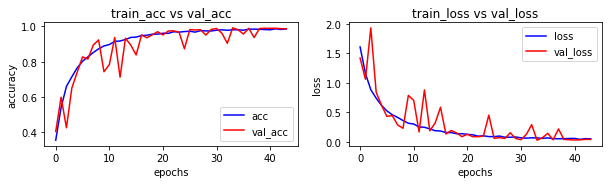

In [19]:
plot_accuracy_loss(history)

# Pridict

In [20]:
pred_path = 'E://mask_data//20211224_data//test//'
pred_data = list(test_generator.class_indices.keys())
print(pred_data)

class_names = pred_data


fp_count = 0
labels = []
images = []
pred_labels = []
y_predictions_All = []
file_count = 0
for pred_dir_name in pred_data:
    pred_file_path = pred_path+pred_dir_name
    pred_file_list = os.listdir(pred_file_path)
    for file_name in pred_file_list:
        file_count = file_count+1
        image = cv2.imread(pred_file_path+'/'+file_name)
        image = np.array(image)
#         image = cv2.resize(image,(360 , 210))
        image = cv2.resize(image,(240 , 140))
        image = image/255
        image = tf.image.rgb_to_grayscale(image)
        image = tf.image.grayscale_to_rgb(image)
        
#         for model in model_file:
#             model = tf.keras.models.load_model('20220208_(70_120)_model_acc_loss_pic_B0-B7//'+model)
#             predictions = model.predict(test_generator)
#             pred_labels = np.argmax(predictions, axis = 1) 
#             pred_labels = np.array(pred_labels,dtype = 'int32')
#             y_predictions_All.append(pred_labels)
        images.append(image)
        labels.append(pred_data.index(pred_dir_name))
        for_pred_labels = utils.to_categorical(labels , nb_classes , dtype = 'int32')

['NG', 'error_ear', 'error_iron', 'error_solder', 'noearing', 'noiron', 'normal']


In [21]:
images = np.array(images , dtype = 'float32')
labels = np.array(labels , dtype = 'int32')

In [22]:
model = tf.keras.models.load_model(filepath)

results = model.evaluate(images, for_pred_labels, batch_size=128)
print("test loss, test acc:", results)

19/19 [==============================] - 21s 792ms/step - loss: 0.4272 - accuracy: 0.9020
test loss, test acc: [0.4272075891494751, 0.9020425081253052]


In [23]:
predictions = model.predict(images)     
pred_labels = np.argmax(predictions, axis = 1) 
pred_labels = np.array(pred_labels,dtype = 'int32')
pred_labels

array([0, 0, 0, ..., 2, 6, 6])

In [24]:
pred_labels

array([0, 0, 0, ..., 2, 6, 6])

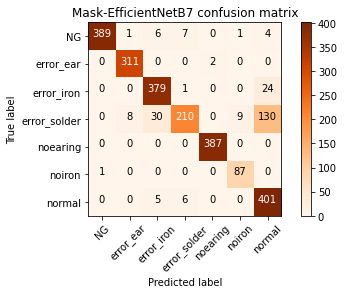

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title='Mask-EfficientNetB7 confusion matrix'

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.savefig('E://Mask_confusion//Mask-EvolvedB0.jpg')
    plt.show()


confusion_mtx = confusion_matrix(labels, pred_labels)
plot_confusion_matrix(confusion_mtx, classes = class_names)